In [39]:
# Installing Ultratyics

!pip install ultralytics

In [40]:
pip install pillow==9.1.0


In [41]:
! pip install opencv-python

In [42]:
import cv2
print(cv2.__version__)

4.10.0


In [43]:
import cv2
import os

def extract_frames(video_path, output_dir):
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Created directory: {output_dir}")

    # Start capturing the video
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    frame_count = 0

    while True:
        # Read frame by frame
        ret, frame = cap.read()

        # If frame is read correctly ret is True
        if not ret:
            print("Reached end of video or encountered an error. Exiting.")
            break

        # Construct the output frame path
        frame_path = os.path.join(output_dir, f"frame_{frame_count:04d}.jpg")
        cv2.imwrite(frame_path, frame)
        print(f"Saved frame {frame_count} to: {frame_path}")
        frame_count += 1

    cap.release()
    print("Finished extracting frames.")

# Paths
video_path = '/content/HW4/video.mp4'
output_dir = '/content/HW4/frames'

# Extract frames
extract_frames(video_path, output_dir)

Saved frame 0 to: /content/HW4/frames/frame_0000.jpg
Saved frame 1 to: /content/HW4/frames/frame_0001.jpg
Saved frame 2 to: /content/HW4/frames/frame_0002.jpg
Saved frame 3 to: /content/HW4/frames/frame_0003.jpg
Saved frame 4 to: /content/HW4/frames/frame_0004.jpg
Saved frame 5 to: /content/HW4/frames/frame_0005.jpg
Saved frame 6 to: /content/HW4/frames/frame_0006.jpg
Saved frame 7 to: /content/HW4/frames/frame_0007.jpg
Saved frame 8 to: /content/HW4/frames/frame_0008.jpg
Saved frame 9 to: /content/HW4/frames/frame_0009.jpg
Saved frame 10 to: /content/HW4/frames/frame_0010.jpg
Saved frame 11 to: /content/HW4/frames/frame_0011.jpg
Saved frame 12 to: /content/HW4/frames/frame_0012.jpg
Saved frame 13 to: /content/HW4/frames/frame_0013.jpg
Saved frame 14 to: /content/HW4/frames/frame_0014.jpg
Saved frame 15 to: /content/HW4/frames/frame_0015.jpg
Saved frame 16 to: /content/HW4/frames/frame_0016.jpg
Saved frame 17 to: /content/HW4/frames/frame_0017.jpg
Saved frame 18 to: /content/HW4/frames

In [6]:
!zip -r frames.zip '/content/HW4/frames'

  adding: content/HW4/frames/ (stored 0%)
  adding: content/HW4/frames/frame_0020.jpg (deflated 0%)
  adding: content/HW4/frames/frame_0327.jpg (deflated 0%)
  adding: content/HW4/frames/frame_0106.jpg (deflated 0%)
  adding: content/HW4/frames/frame_0165.jpg (deflated 0%)
  adding: content/HW4/frames/frame_0481.jpg (deflated 0%)
  adding: content/HW4/frames/frame_0426.jpg (deflated 0%)
  adding: content/HW4/frames/frame_0089.jpg (deflated 0%)
  adding: content/HW4/frames/frame_0213.jpg (deflated 0%)
  adding: content/HW4/frames/frame_0078.jpg (deflated 0%)
  adding: content/HW4/frames/frame_0282.jpg (deflated 0%)
  adding: content/HW4/frames/frame_0011.jpg (deflated 0%)
  adding: content/HW4/frames/frame_0417.jpg (deflated 0%)
  adding: content/HW4/frames/frame_0006.jpg (deflated 0%)
  adding: content/HW4/frames/frame_0191.jpg (deflated 0%)
  adding: content/HW4/frames/frame_0013.jpg (deflated 0%)
  adding: content/HW4/frames/frame_0329.jpg (deflated 0%)
  adding: content/HW4/frames/f

In [7]:
from google.colab import files
files.download('frames.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Base path to Google Drive folder
base_path = '/content/drive/My Drive/Manually Labelled Images'

# Paths to images and labels within the Google Drive folder
src_images = os.path.join(base_path, 'images')
src_labels = os.path.join(base_path, 'labels')

# Destination base path within the Google Drive for the split dataset
dest_base = os.path.join(base_path, 'dataset')

# Getting a list of filenames without extension
filenames = [os.path.splitext(f)[0] for f in os.listdir(src_images) if os.path.isfile(os.path.join(src_images, f))]

# Splitting filenames into train, val, and test
train_files, test_files = train_test_split(filenames, test_size=0.2, random_state=42)  # 80% train, 20% for val+test
val_files, test_files = train_test_split(test_files, test_size=0.5, random_state=42)  # Splitting the remaining 20% into 10% val, 10% test

# Function to copy files
def copy_files(files, src_images, src_labels, dest_images, dest_labels):
    for f in files:
        shutil.copy(os.path.join(src_images, f + '.jpg'), dest_images)
        shutil.copy(os.path.join(src_labels, f + '.txt'), dest_labels)

# Execute copying
for split in [('train', train_files), ('val', val_files), ('test', test_files)]:
    dest_images = os.path.join(dest_base, split[0], 'images')
    dest_labels = os.path.join(dest_base, split[0], 'labels')
    os.makedirs(dest_images, exist_ok=True)
    os.makedirs(dest_labels, exist_ok=True)
    copy_files(split[1], src_images, src_labels, dest_images, dest_labels)

In [46]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 37.5/235.7 GB disk)


In [47]:
# Upgrade to latest version
!pip install -U albumentations


  Using cached albumentations-1.4.16-py3-none-any.whl.metadata (38 kB)
Using cached albumentations-1.4.16-py3-none-any.whl (214 kB)
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.0.0
    Uninstalling albumentations-1.0.0:
      Successfully uninstalled albumentations-1.0.0


In [48]:
# Alternatively, downgrade if the issue persists
!pip install albumentations==1.0.0

  Using cached albumentations-1.0.0-py3-none-any.whl.metadata (31 kB)
Using cached albumentations-1.0.0-py3-none-any.whl (98 kB)
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.16
    Uninstalling albumentations-1.4.16:
      Successfully uninstalled albumentations-1.4.16


In [49]:
from ultralytics import YOLO

from IPython.display import display, Image

In [50]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # load
2024-0

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
!mkdir -p "/content/drive/MyDrive/My Courses/YOLOv8"

%cd /content/drive/MyDrive/My Courses/YOLOv8

/content/drive/MyDrive/My Courses/YOLOv8


In [53]:
%cd "/content/drive/MyDrive/My Courses/YOLOv8"
!yolo task=train mode=train model=yolov8s.pt data='/content/drive/MyDrive/My Courses/YOLOv8/Manually Labelled Images/dataset/data.yaml' epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/My Courses/YOLOv8
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load

## Results

### Overall Performance
The YOLOv8 model completed 25 training epochs with moderate performance overall, showing a mean precision (P) of 0.504 and recall (R) of 0.35 across all classes. The mean Average Precision (mAP) at IoU=0.5, which measures the accuracy of object detection, was recorded at 0.287, while the more challenging mAP across IoU=0.5:0.95 was at 0.198. These results indicate that while the model can detect objects with some level of precision, its ability to generalize across varying overlap thresholds remains limited. Training was efficient, with an inference speed of 3.6ms per image and post-processing taking an additional 1.4ms.

### Class-wise Performance
The model's performance varies significantly across classes:
- **Car:** Achieved the highest results with a precision of 0.843, perfect recall of 1.0, and mAP50 of 0.995, reflecting accurate detections and high confidence. This suggests that the model is well-optimized for recognizing cars.
- **Pedestrian:** The model struggled considerably with pedestrians, having zero precision, recall, and mAP, indicating that it was unable to effectively identify instances of this class.
- **Bus:** Similarly, the model detected buses with a recall of 0, meaning it failed to identify any bus instances correctly despite having a precision of 1.0, likely due to misclassification or difficulty in detection.
- **Crosswalk:** This class showed modest performance, with a precision of 0.174 and a recall of 0.4, but with a low mAP50 of 0.151, suggesting challenges in recognizing and localizing crosswalk features effectively.

Overall, while the model demonstrates strong performance in detecting cars, improvements are necessary for enhancing detection and classification accuracy for pedestrians, buses, and crosswalks.

In [54]:
!ls runs/detect/train6

args.yaml					     R_curve.png       train_batch45.jpg
confusion_matrix.png				     results.csv       train_batch46.jpg
events.out.tfevents.1727492029.0fcb22cf4dff.26267.0  results.png       train_batch47.jpg
F1_curve.png					     train_batch0.jpg  val_batch0_labels.jpg
P_curve.png					     train_batch1.jpg  val_batch0_pred.jpg
PR_curve.png					     train_batch2.jpg  weights


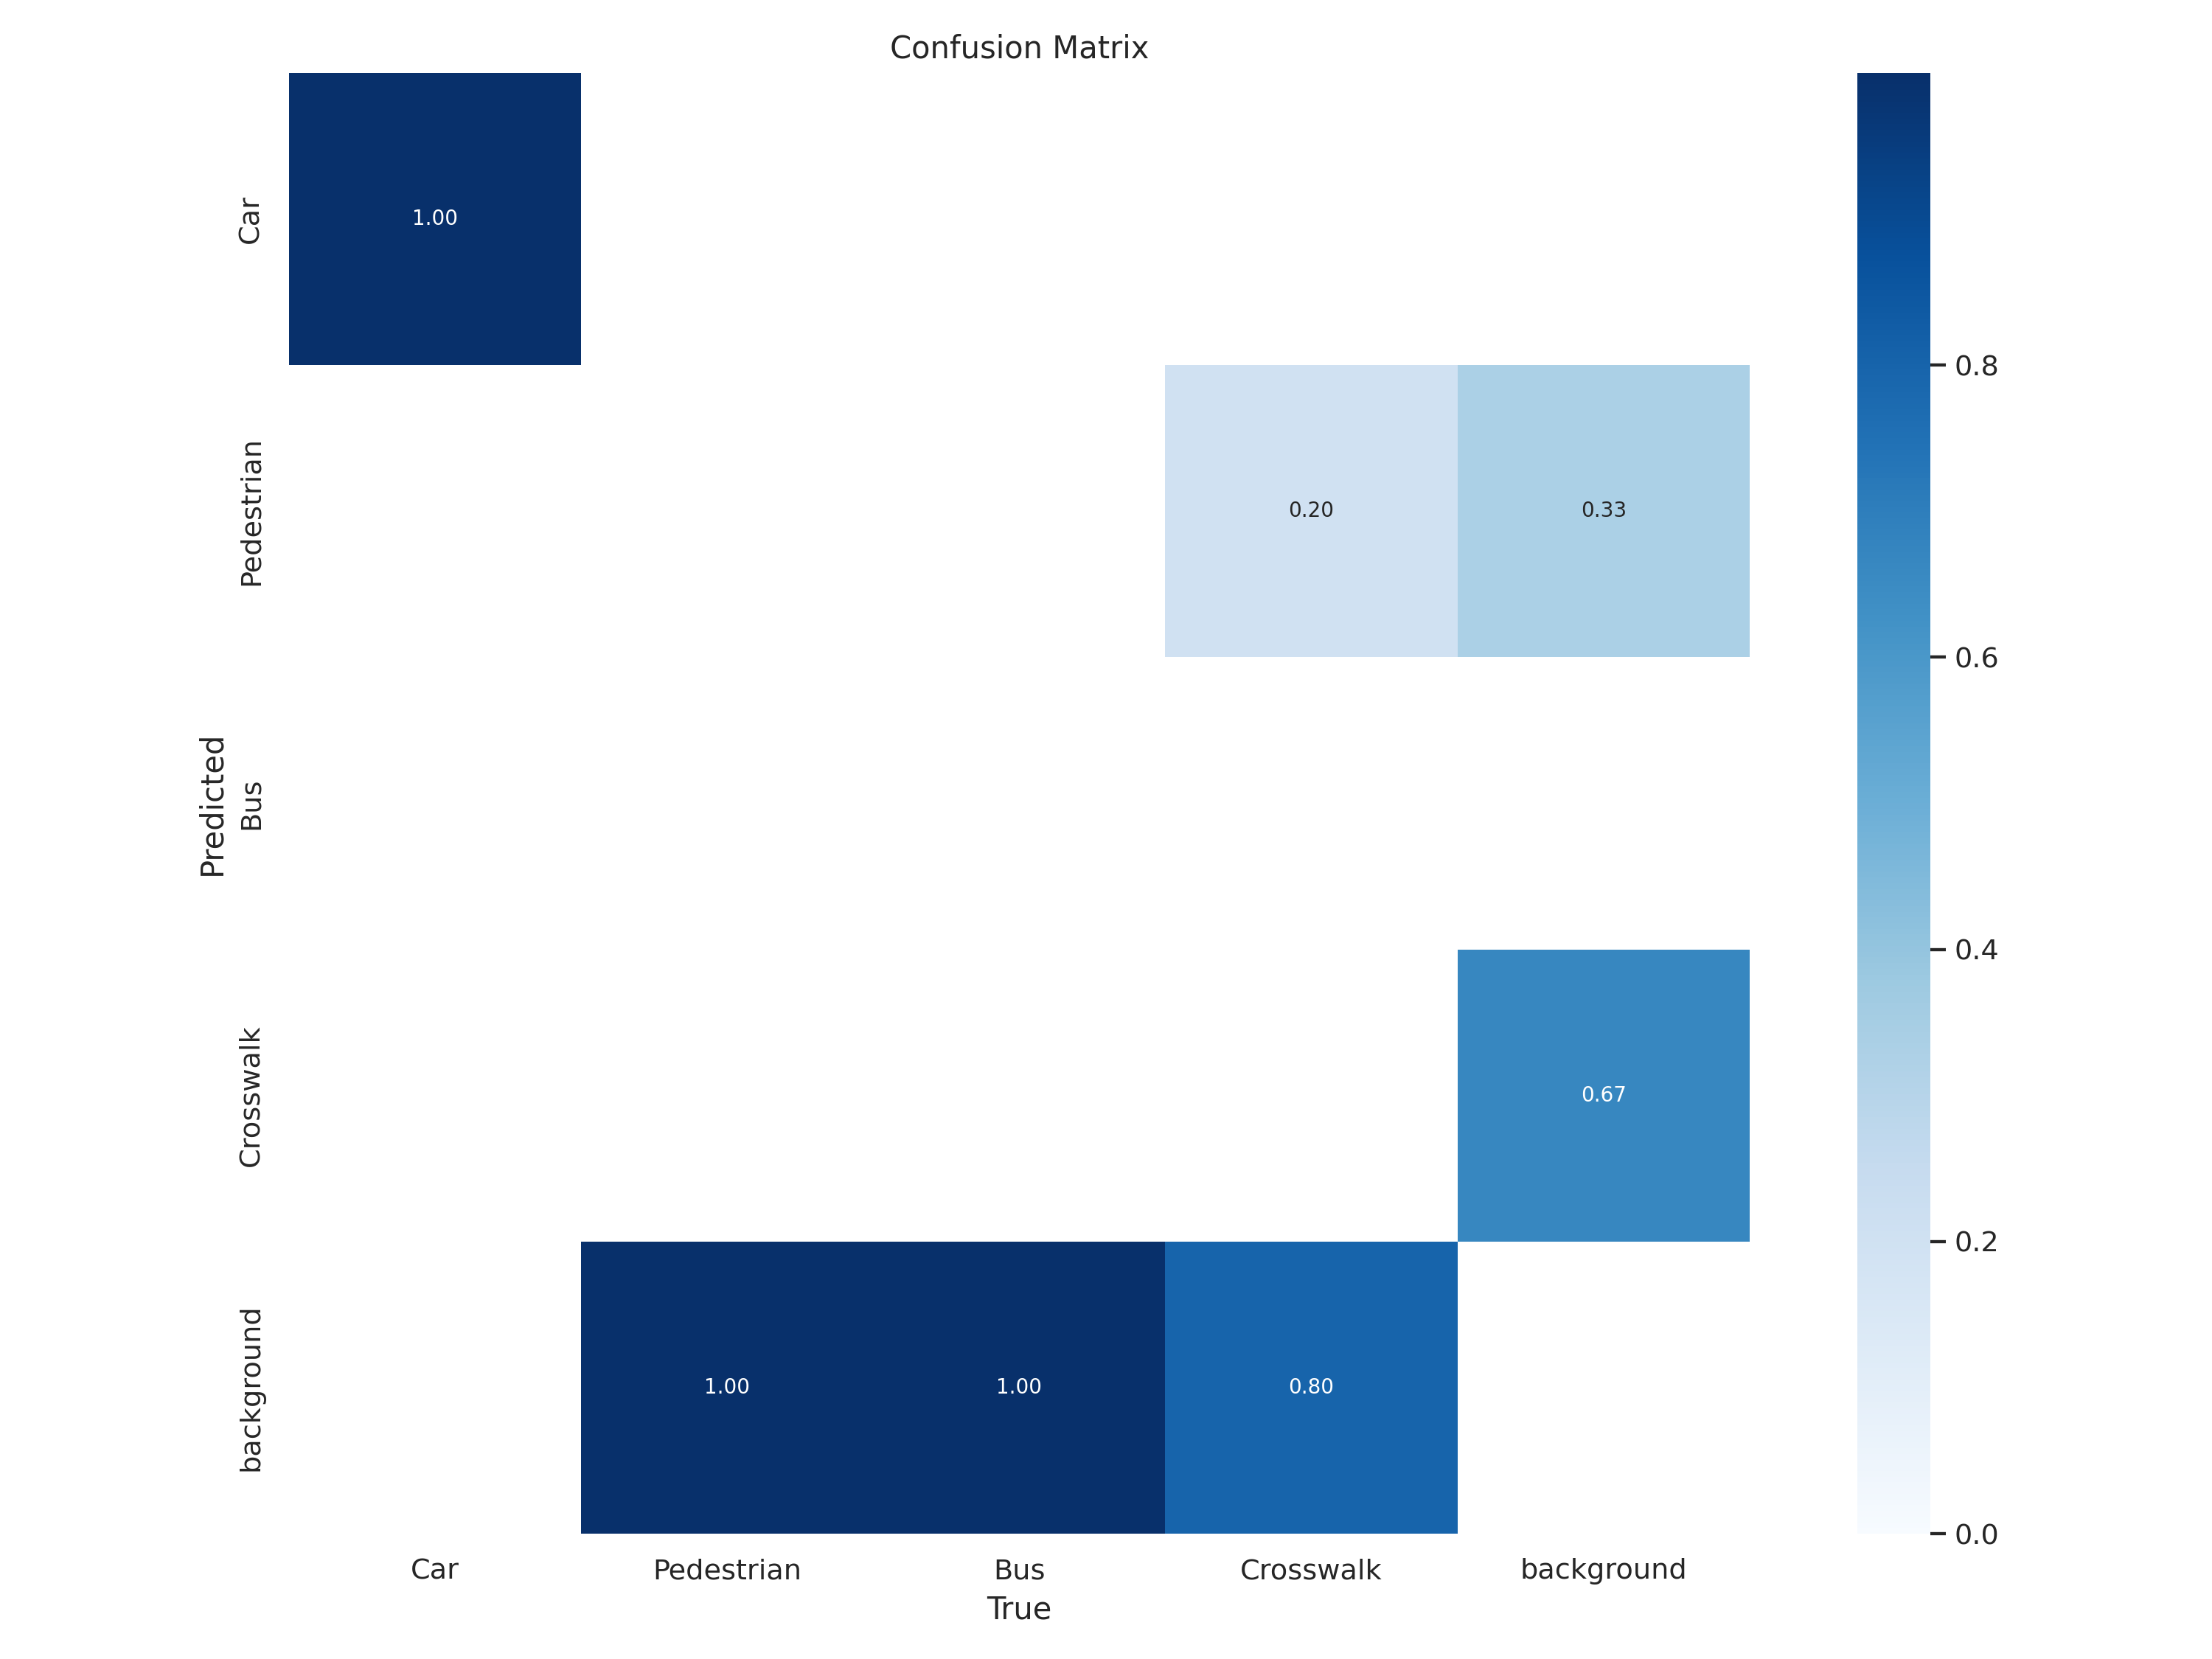

In [55]:
Image(filename='runs/detect/train6/confusion_matrix.png', width=600)

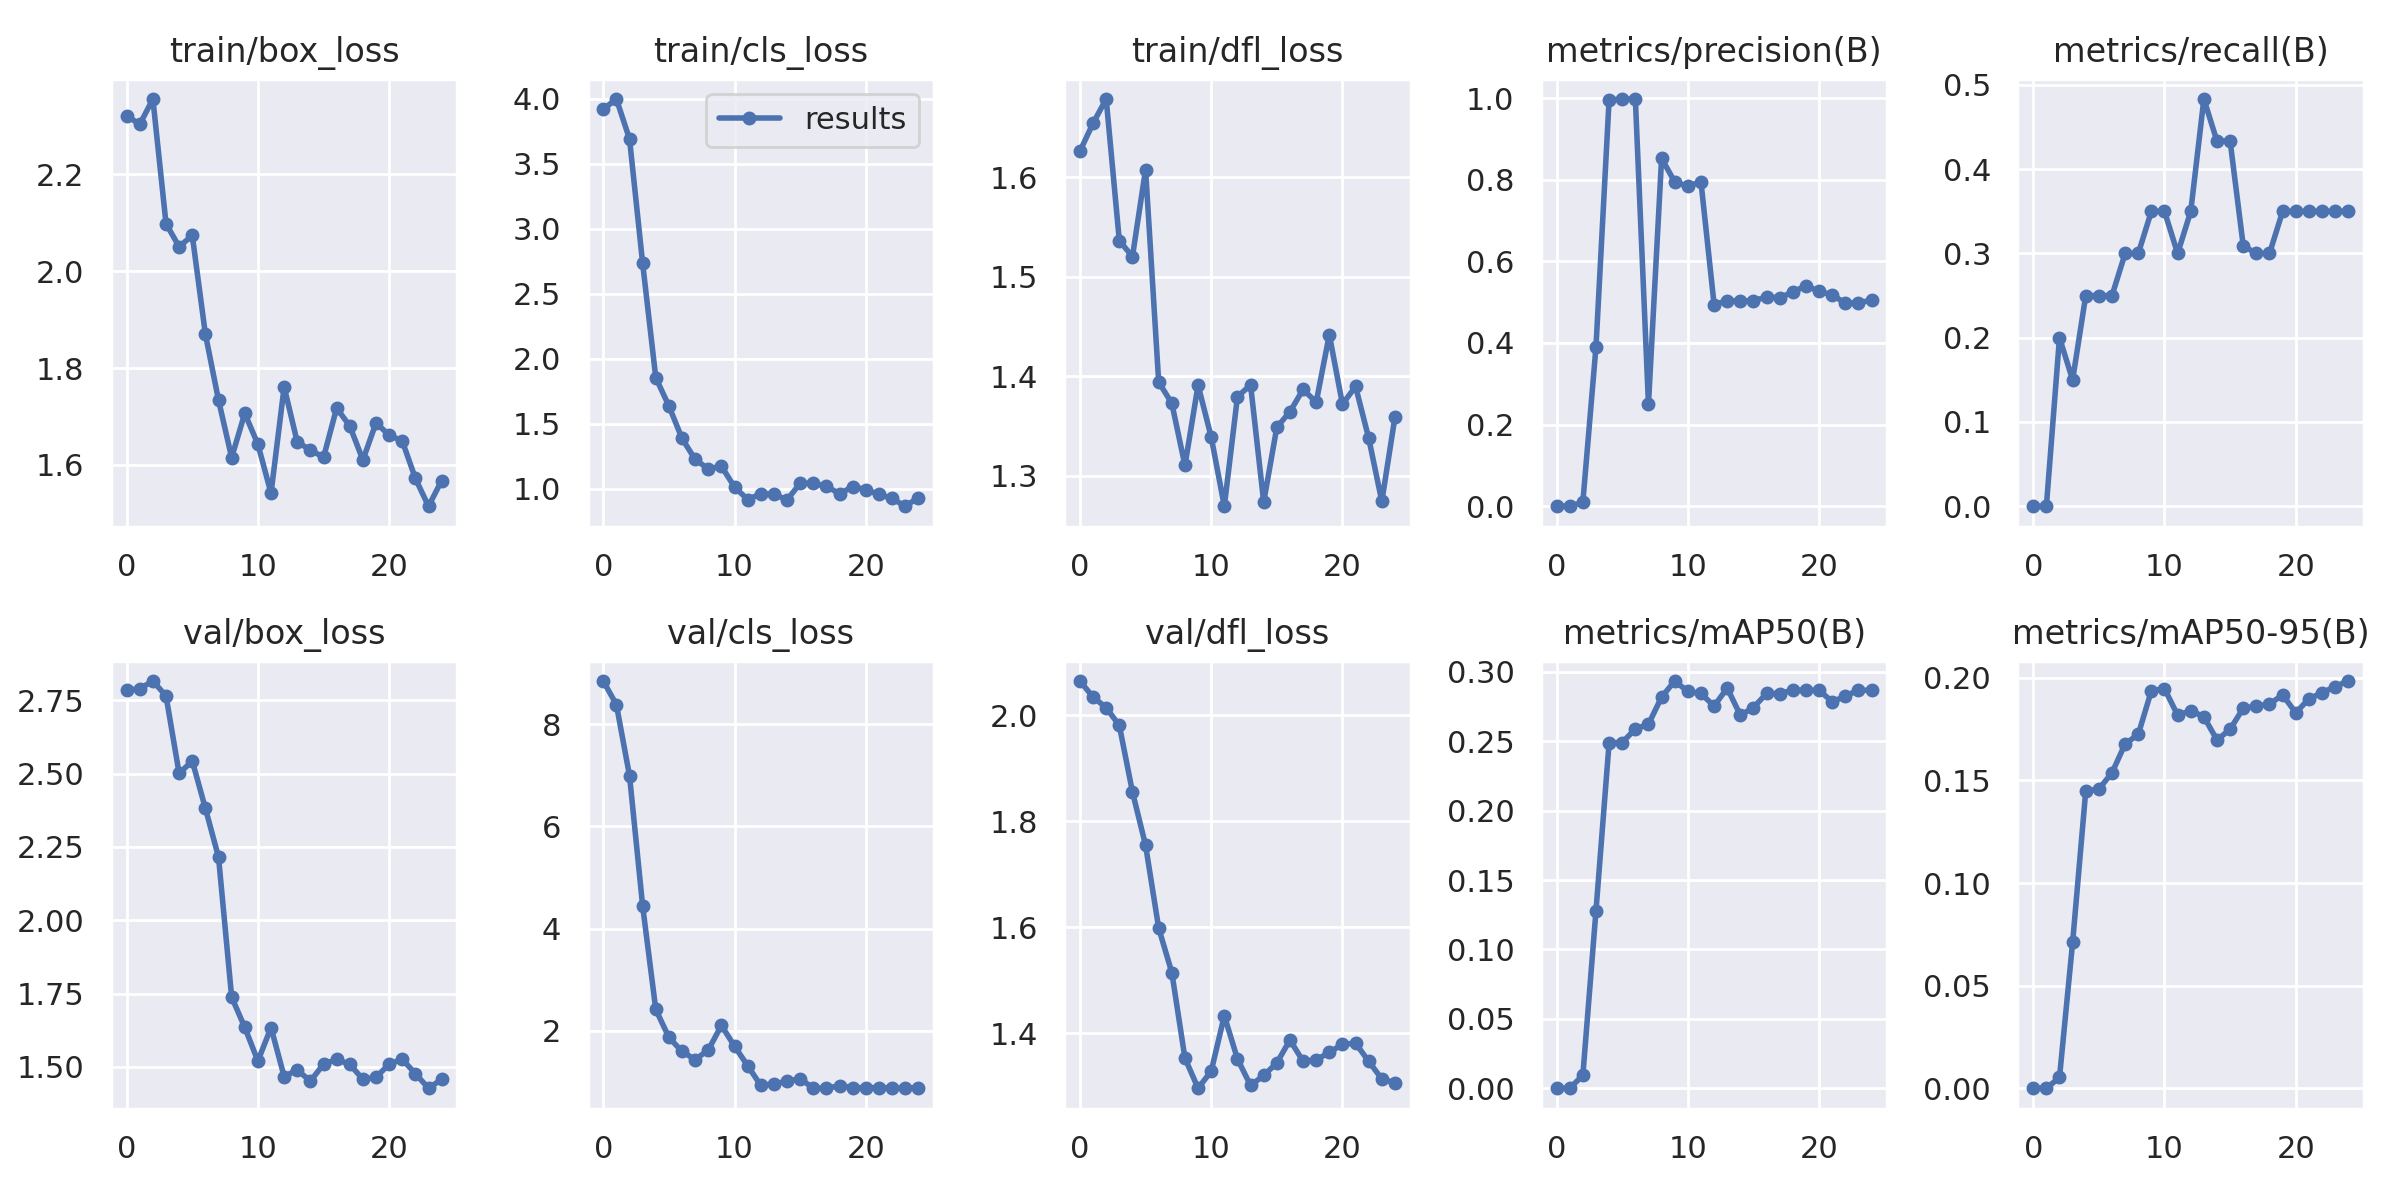

In [56]:
Image(filename='runs/detect/train6/results.png', width=600)

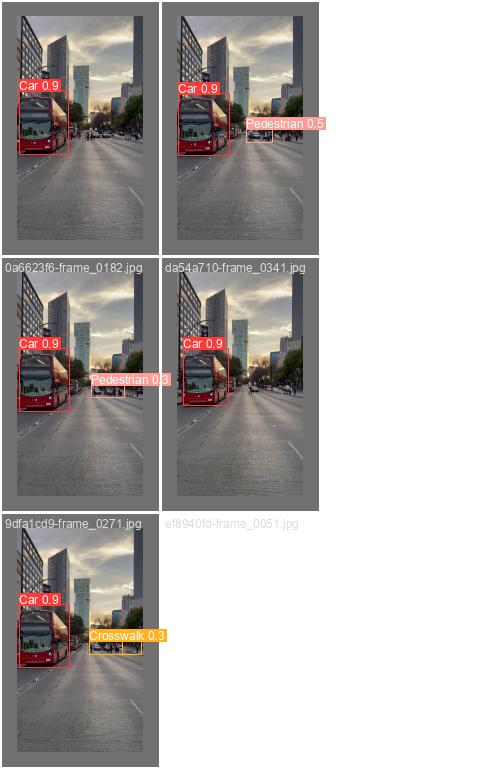

In [57]:
Image(filename='runs/detect/train6/val_batch0_pred.jpg', width=600)

In [58]:
!yolo task=detect mode=val model=runs/detect/train5/weights/best.pt data='/content/drive/MyDrive/Manually Labelled Images/dataset/data.yaml'

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # load
2024-0

The validation results of the YOLOv8 model show a moderate performance overall, with a precision of 0.504 and a recall of 0.35 across all classes. The model achieves a mean Average Precision at IoU=0.5 (mAP50) of 0.287 and an mAP50-95 of 0.198, indicating difficulties in consistent detection across various thresholds. The "Car" class performs notably well, with a precision of 0.843, perfect recall of 1.0, and mAP50 of 0.995, suggesting highly accurate detections. However, the model struggles significantly with "Pedestrian" and "Bus," achieving zero precision and recall, implying a failure to detect these classes effectively. The "Crosswalk" class shows low precision (0.174) and moderate recall (0.4), with a low mAP50 (0.151), indicating challenges in identifying crosswalk features. The inference process is relatively fast, taking 22.1ms per image, though post-processing is slower at 164.3ms per image. Further tuning is needed to improve detection for underperforming classes.

## Inference with Custom Model


In [59]:
import os

directory = "/content/drive/MyDrive/Manually Labelled Images/dataset/test"
contents = os.listdir(directory)
print(contents)

['images', 'labels']


In [60]:
!ls /content/drive/MyDrive/Manually\ Labelled\ Images/dataset/test/images

1bf14053-frame_0311.jpg  6863e805-frame_0331.jpg  d77a1727-frame_0413.jpg  ed13634a-frame_0107.jpg
33986590-frame_0270.jpg  b89ccf77-frame_0230.jpg  dc0fa260-frame_0388.jpg  f7766b62-frame_0308.jpg
3970c445-frame_0477.jpg  bf8fdb61-frame_0020.jpg  e38f1b6e-frame_0372.jpg


In [62]:
!yolo task=detect mode=predict model=runs/detect/train6/weights/best.pt conf=0.25 source='/content/drive/MyDrive/Manually Labelled Images/dataset/test/images'

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # load
2024-0

**NOTE:** Let's take a look at few results.

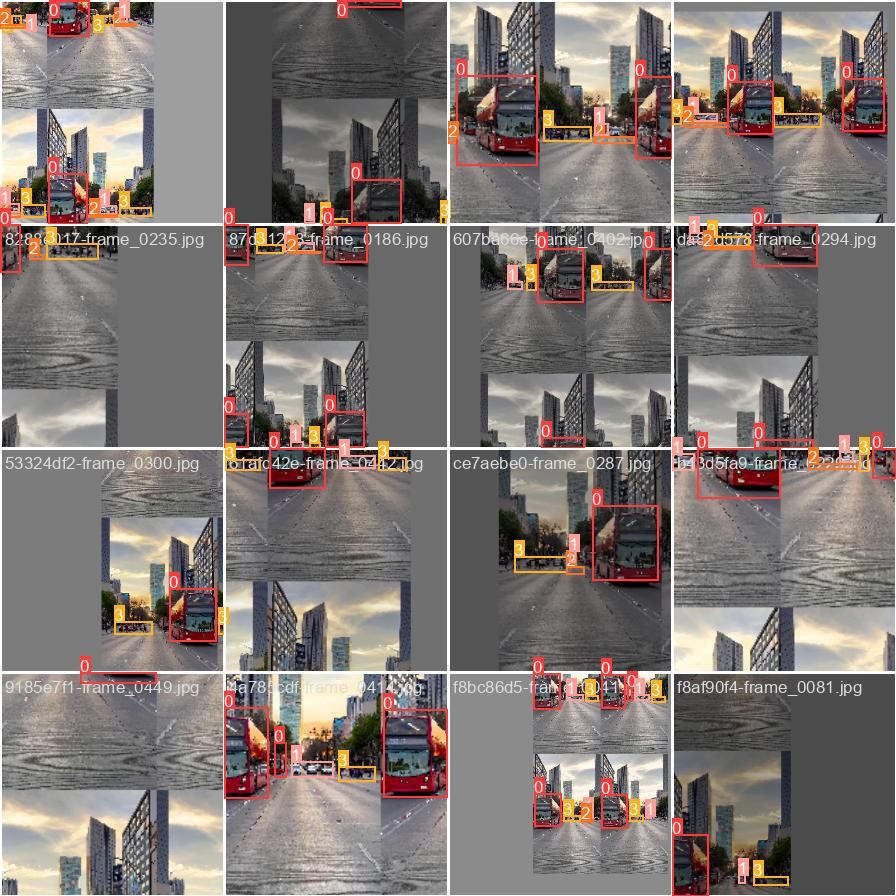

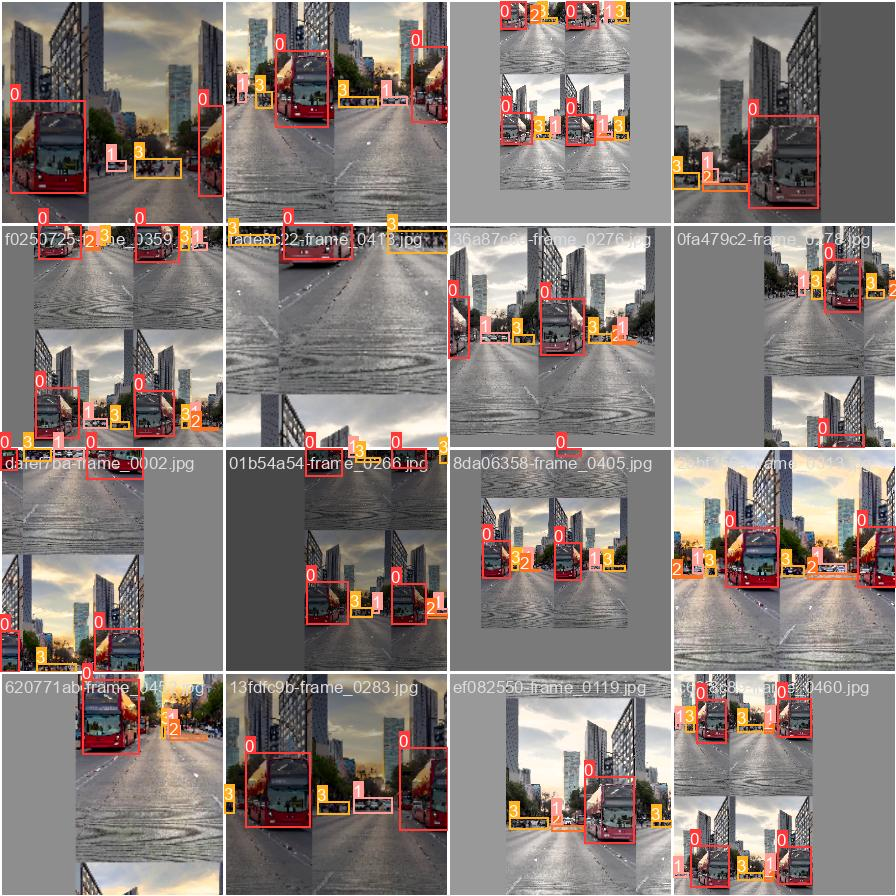

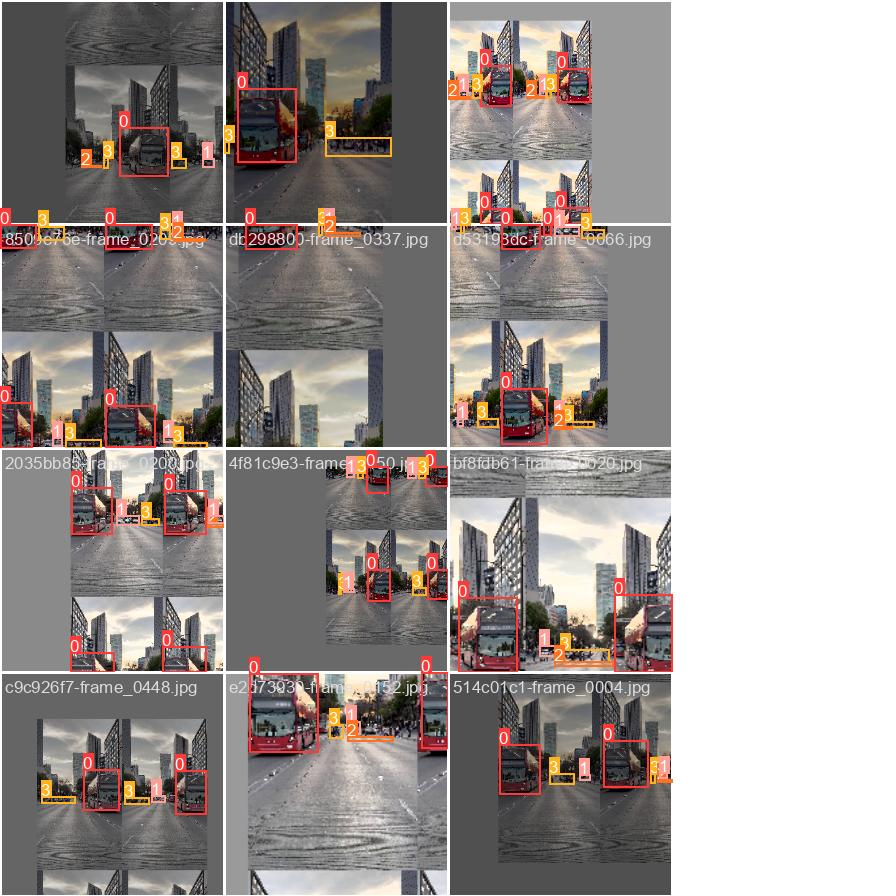

In [63]:
import glob
from IPython.display import Image, display

# Specifying the path where the detection result images are stored
result_images_path = '/content/drive/MyDrive/My Courses/YOLOv8/runs/detect/train6/*.jpg'

# Getting a list of paths for the result images
result_image_paths = glob.glob(result_images_path)[:3]

# Displaying each result image
for image_path in result_image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

##### The model's current performance is not fully optimal, as it was trained on a limited dataset of only 55 image frames that were manually annotated. However, it is anticipated that its predictive accuracy will significantly improve with the incorporation of a larger dataset.

In [64]:
import cv2
import glob

# Directory containing the detection result images
result_images_path = '/content/drive/MyDrive/My Courses/YOLOv8/runs/detect/train6/*.jpg'

# Getting the list of result image paths
result_image_paths = sorted(glob.glob(result_images_path))

# Initializing video writer
video_output_path = '/content/drive/MyDrive/My Courses/YOLOv8/runs/detect/train6/detection_results.mp4'
frame_size = (1920, 1080)  # Adjust as needed
fps = 30
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(video_output_path, fourcc, fps, frame_size)

# Writing the images to video
for image_path in result_image_paths:
    img = cv2.imread(image_path)
    video_writer.write(img)

# Releasing the video writer
video_writer.release()

print("Video created successfully.")

Video created successfully.
